# Stock Market API Project

### Alpha Vantage API
Link - [https://rapidapi.com/alphavantage/api/alpha-vantage](https://rapidapi.com/alphavantage/api/alpha-vantage)

In [3]:
%pip install requests python-dotenv plotly nbformat 

  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import requests
from dotenv import load_dotenv
import os 

In [5]:
load_dotenv()

True

In [9]:
api_key = os.getenv("API_KEY")

In [10]:
import pandas as pd

In [14]:
def symbol_search(company):
	url = "https://alpha-vantage.p.rapidapi.com/query"

	querystring = {"datatype":"json","keywords":company,"function":"SYMBOL_SEARCH"}

	headers = {
		"x-rapidapi-key": api_key,
		"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
	}

	response = requests.get(url, headers=headers, params=querystring)

	data = response.json()["bestMatches"]
	df = pd.DataFrame(data)
	return df 

In [15]:
symbol_search(company="State Bank of India")

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,SBIN.BSE,State Bank of India,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,1.0000
1,SBKFF,State Bank of India,Equity,United States,09:30,16:00,UTC-04,USD,1.0000
2,SID.FRK,State Bank of India,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,1.0000
3,SBID.LON,State Bank of India GDR,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.9048


In [16]:
symbol_search(company="Tesla")

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,TSLA,Tesla Inc,Equity,United States,09:30,16:00,UTC-04,USD,0.8889
1,TL0.DEX,Tesla Inc,Equity,XETRA,08:00,20:00,UTC+02,EUR,0.7143
2,TL0.FRK,Tesla Inc,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.7143
3,TSLA34.SAO,Tesla Inc,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.7143
4,TL01.FRK,TESLA INC. CDR DL-001,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.3846


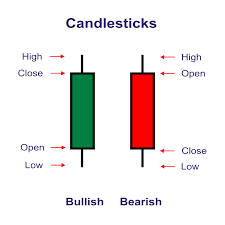

### Creating a class to fetch and visualize stock market data

In [17]:
import plotly.graph_objects as go

In [28]:
class StockFetch:

    def __init__(self, api_key) -> None:
        self.api_key = api_key
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
            "x-rapidapi-key": self.api_key,
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
        }

    def search(self, company):
        querystring = {"datatype":"json","keywords":company,"function":"SYMBOL_SEARCH"}
        response = requests.get(self.url, headers=self.headers, params=querystring)
        data = response.json()["bestMatches"]
        df = pd.DataFrame(data)
        return df 
    
    def daily_data(self, symbol):
        querystring = {"function":"TIME_SERIES_DAILY","symbol":symbol ,"outputsize":"compact","datatype":"json"}
        response = requests.get(self.url, headers=self.headers, params=querystring)
        data = response.json()["Time Series (Daily)"]
        df = pd.DataFrame(data).T
        df.index = pd.to_datetime(df.index)
        for i in df.columns:
            df[i] = df[i].astype(float)
        return df
    
    def plot_candlestick(self, symbol):
        df = self.daily_data(symbol)
        fig = go.Figure(data= [go.Candlestick(
            x = df.index,
            open = df["1. open"],
            high = df["2. high"],
            low = df["3. low"],
            close = df["4. close"] 
        )])
        fig.update_layout(width=800, height=600)
        fig.show()        

In [29]:
client = StockFetch(api_key = os.getenv("API_KEY"))

In [30]:
a = client.search("State Bank of India")

In [31]:
a

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,SBIN.BSE,State Bank of India,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,1.0000
1,SBKFF,State Bank of India,Equity,United States,09:30,16:00,UTC-04,USD,1.0000
2,SID.FRK,State Bank of India,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,1.0000
3,SBID.LON,State Bank of India GDR,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.9048


In [32]:
a.to_csv("SBIsymbol.csv", index=False)

In [33]:
b = client.daily_data(symbol="SBIN.BSE")

In [34]:
b

,1. open,2. high,3. low,4. close,5. volume
2024-10-04,790.30,809.65,785.20,796.60,1154183.0
2024-10-03,787.40,803.95,784.35,794.35,768391.0
2024-10-01,788.95,799.75,788.25,797.00,227883.0
2024-09-30,801.15,802.50,786.15,787.60,1054719.0
2024-09-27,802.00,807.85,798.40,802.65,669965.0
...,...,...,...,...,...
2024-05-17,815.15,822.40,811.50,817.85,742324.0
2024-05-16,825.00,826.00,797.50,811.90,827240.0
2024-05-15,821.95,825.35,818.05,820.40,282771.0
2024-05-14,812.70,822.00,808.00,818.15,365478.0


In [35]:
b.to_csv("SBIStockDaily.csv")

### Visualize the stock

In [36]:
client.plot_candlestick(symbol="SBIN.BSE")

In [37]:
client.plot_candlestick(symbol="TSLA")